# Optymalizacja ciągła
## Labolatorium 6: Metoda Newtona



In [2]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import io

plt.style.use("ggplot") # tak żeby wykresy były ładniejsze
%matplotlib inline


## Zadanie 1

Zaimplementuj algorytm Newtona dla funkcji jednowymiarowej. Zadanie to wymaga zaimplementowania gradientu (właściwie pochodnej), hesjanu (właściwie drugiej pochodnej) oraz aktualizacji $x$ na podstawie obliczonych wartości. Zainicjalizuj punkt startowy losowo, a potem popróbuj z różnymi wartościami. Poniżej masz też zaimplementowaną funkcję realizującą algorytm spadku wzdłuż gradientu do celów porównawczych.

Dla przypomnienia: funkcja `plot_gd_1d` (zaimplementowana w pliku helpers.py) służy do wizualizacji działania algorytmu. Funkcja wizualizuje 1) wartość $f(x)$ w czasie oraz 2) wykres $f(x)$ dla kolejnych wartości x wraz ze strzałkami pokazującymi kolejne kroki.

In [18]:
import numpy as np
from helpers import plot_gd_1d
from helpers import plot_gd_2d

import matplotlib.pyplot as plt

plt.style.use("ggplot")

def run_gd(f, gradient, eta,d =1, initial_x = None, axis_range=None):
    assert d in [1,2]
    if initial_x is None:
        initial_x = np.random.random(d)
    x_in_time = [initial_x]

    minimal_change = 0.00001
    max_number_of_steps = 10

    for j in range(max_number_of_steps):
        last_x = x_in_time[-1]
        current_x = last_x - eta * gradient(last_x)
        x_in_time.append(current_x)
        if abs(f(current_x) - f(last_x)) < minimal_change:
            break
    if d==1:
        plot_gd_1d(f, x_in_time, axis_range=axis_range)
    else:
        plot_gd_2d(f, x_in_time, contours=True, axis_range=axis_range)
    return x_in_time

    
def run_newton(f, gradient, hesian, d = 1, initial_x = None, axis_range = None):
    """
    f - funkcja celu
    gradient - funkcja zwracająca gradient
    hesian - funkcja zwracająca hesjan
    d - wymiarowość problemu (1,2)
    initial_x - punkt startowy algorytmu
    axis_range - zakres rysowania wykresu
    """
    assert d in [1,2]
    if initial_x is None:
        initial_x = np.random.random(d)
    x_in_time = [initial_x]

    minimal_change = 0.00001
    max_number_of_steps = 10
    
    grad = gradient(initial_x)
    for j in range(max_number_of_steps):#WARUNEK STOPU:
        last_x = x_in_time[-1]
        # TWÓJ KOD
        grad = gradient(last_x)
        hes = hesian(last_x)
        current_x = last_x - np.linalg.inv(hes)@grad
        x_in_time.append(current_x)
        if abs(f(current_x) - f(last_x)) < minimal_change:
            break
    
    if d==1:
        plot_gd_1d(f, x_in_time, axis_range=axis_range)
    else:
        plot_gd_2d(f, x_in_time, contours=True, axis_range=axis_range)
    return x_in_time

        

Przetestuj twój algorytm na podanej funkcji. Używając argumentu `initial_x` przetestuj start algorytmu z różnych punktów początkowych.

ValueError: x and y can be no greater than 2-D, but have shapes (100, 1) and (100, 1, 1)

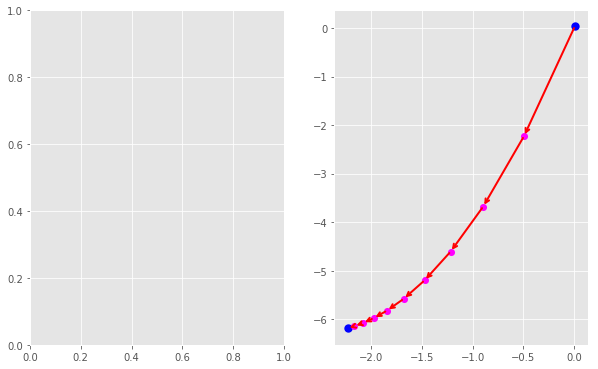

In [8]:
# Funkcja do minimalizacji
f = lambda x: x ** 2 + 5 * x
gradient = lambda x: 2*x +5
hesian = lambda x: 2
run_gd(f, gradient, eta=0.1)
run_newton(f, gradient, hesian)

Przetestuj twój algorytm na funkcjach $\sin(x)$ i $\cos(x)$. Używając argumentu `initial_x` przetestuj start algorytmu z różnych punktów początkowych.

[1.0471975511965976, 1.6245478203862236, 1.5707445002136606, 1.570796326794943]

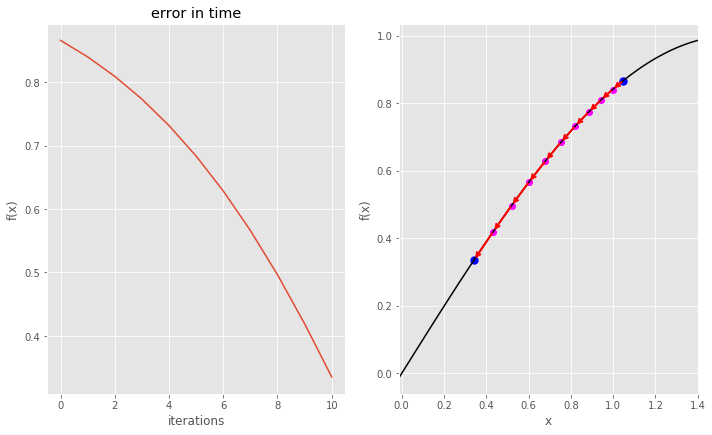

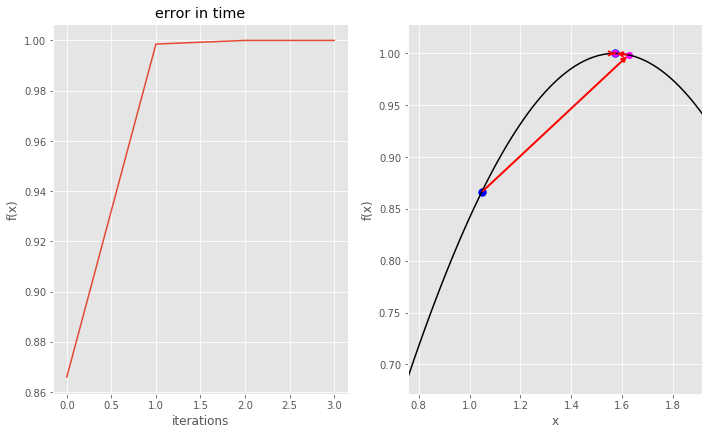

In [17]:
f = lambda x: np.sin(x)
gradient = lambda x: np.cos(x)
hesian = lambda x: -1*np.sin(x)
run_gd(f, gradient, eta=0.1, initial_x=np.pi/3)
run_newton(f, gradient, hesian, initial_x=np.pi/3)

Przetestuj algorytmy na funkcji $ f(x) = 1 - \frac{\sin(x)}{ x}$, funkcję warto narysować w większym zakresie np. od -10 do 10 (twój algorytm ma parametr `axis_range=[-10,10]`)

[1, -0.2594158454760205, 0.0035461137718640345, -8.918463819014566e-09]

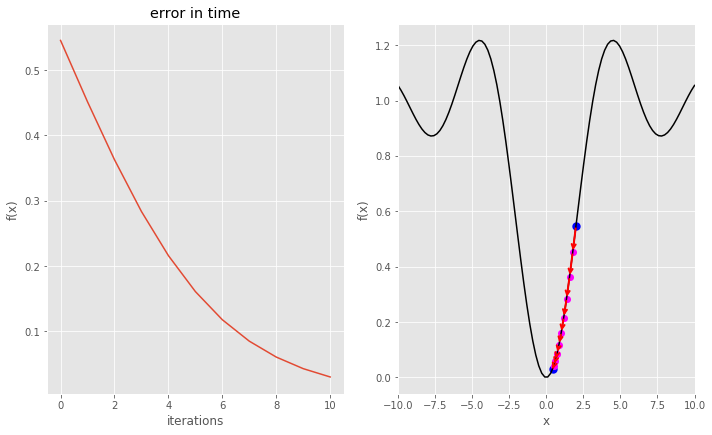

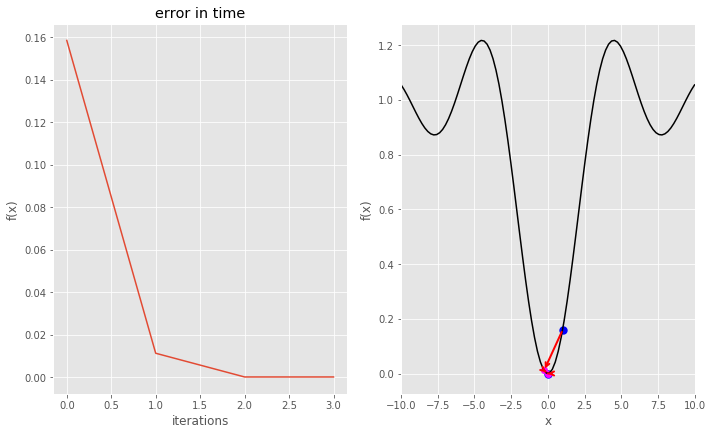

In [12]:
# Funkcja do minimalizacji
f = lambda x: 1 - np.sin(x) / x
gradient = lambda x: (np.sin(x)-x*np.cos(x) )/ x**2
hesian = lambda x: (np.sin(x)*(x**2-2)+2*x*np.cos(x) )/ x**3
run_gd(f, gradient, eta=0.5, axis_range=[-10,10], initial_x=2)
run_newton(f, gradient, hesian, axis_range=[-10,10], initial_x=1)

## Zadanie 2

Rozszerz twoją implementację o optymalizację funkcji 2D. A następnie przetestuj ją na podanej funkcji.

[array([0.05741436, 0.01076926]),
 array([ 0.00000000e+00, -1.73472348e-18]),
 array([0., 0.])]

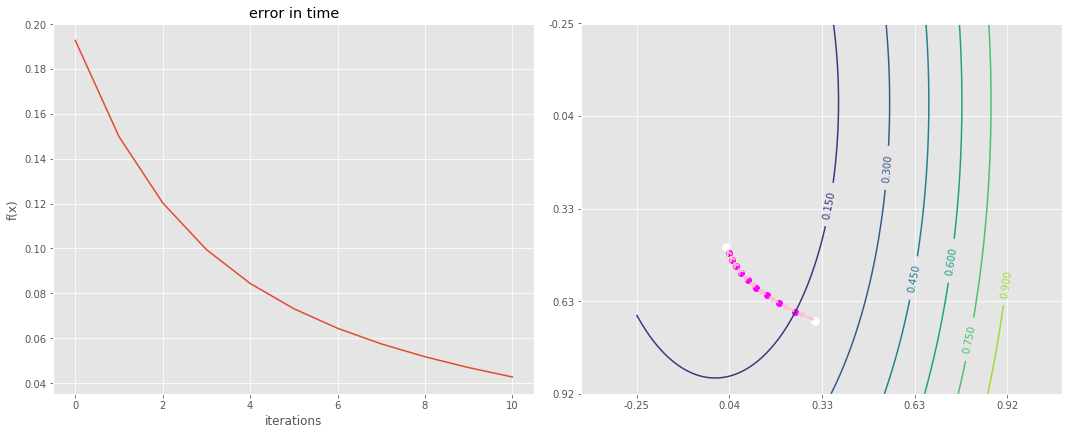

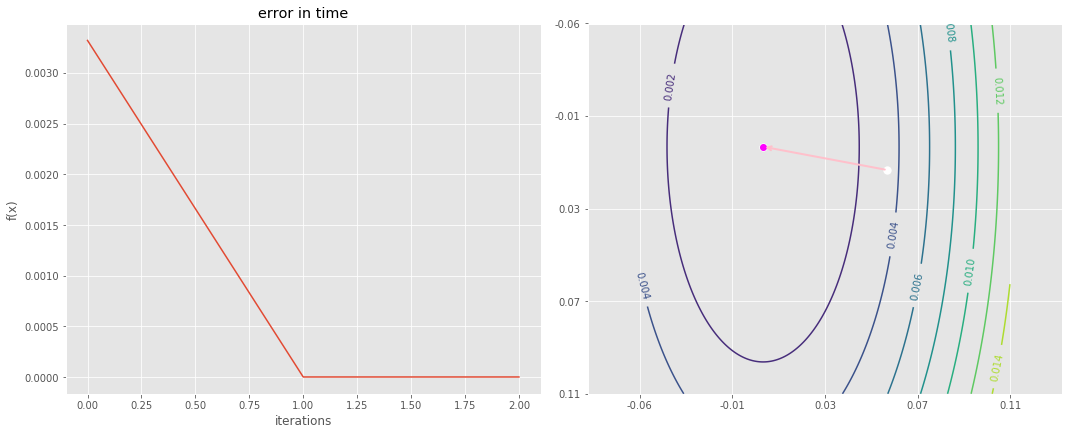

In [19]:
a = np.array([[1,0],[0,0.2]])
f = lambda x: x.T@a@x
gradient = lambda x: 2*a@x
hesian = lambda x: 2*a

run_gd(f, gradient, eta=0.1, d=2)
run_newton(f, gradient, hesian, d=2)

To było proste. Ale co się stanie z funkcją w której zmienne nie są niezależne? Przetestuj funkcję 
$x^TAx$ gdzie $A =  
\begin{bmatrix}
  1&2\\2&10
\end{bmatrix}$.
Sprawdź inne funkcje z wysokim współczynnikiem uwarunkowania problemu.

[array([0.03038077, 0.48750718]),
 array([-2.22044605e-16,  0.00000000e+00]),
 array([0., 0.])]

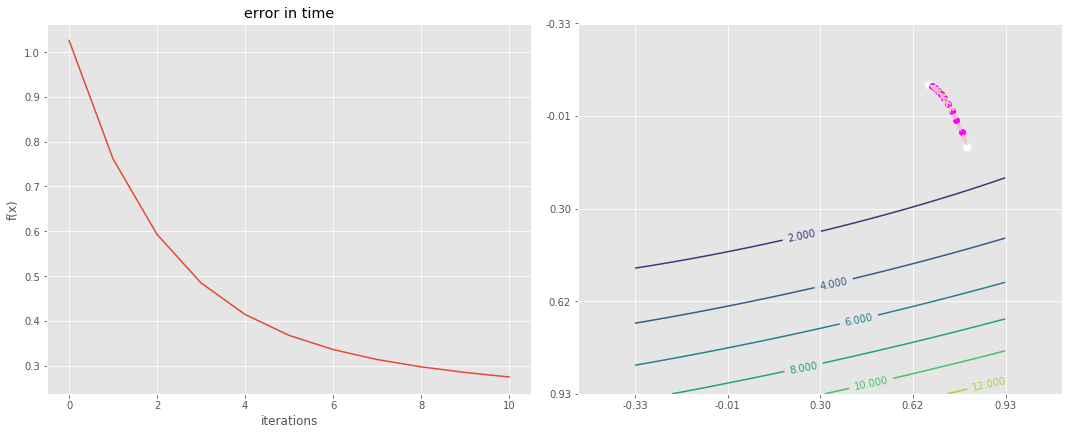

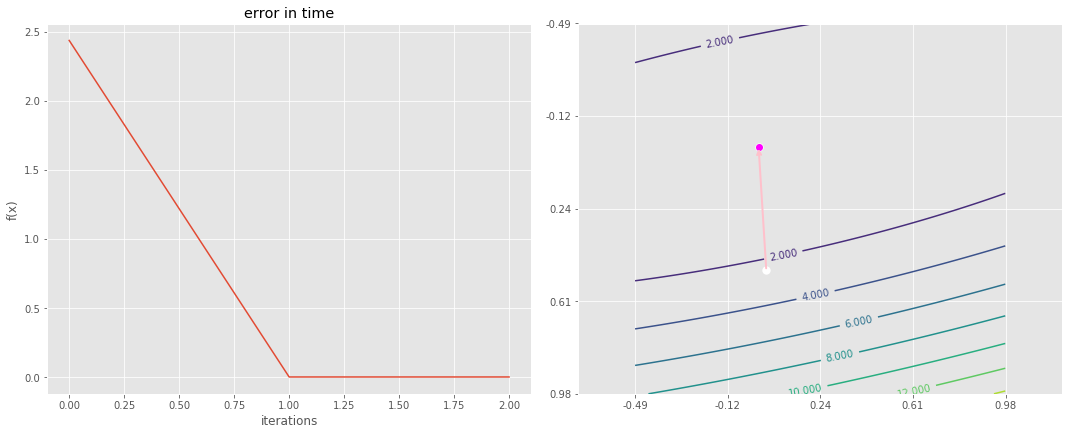

In [20]:
a = np.array([[1,2],[2,10]])
f = lambda x: x.T@a@x
gradient = lambda x: 2*a@x
hesian = lambda x: 2*a
run_gd(f, gradient, eta=0.01, d=2)
run_newton(f, gradient, hesian, d=2)


Czas na funkcje niewypukłe:
![Rosenbrock](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Rosenbrock%27s_function_in_3D.pdf/page1-640px-Rosenbrock%27s_function_in_3D.pdf.jpg "Rosenbrock function")
$$f(x,y)=100*(y-x^2)^2+(1-x)^2$$
Przetestuj kilka punktów startowych np. $[0,0], [-1.5,2.5],[1.7,2.7], [-.3,.85], [10,10]$. Funkcja osiąga minimum w punkcie $[1,1]$ - sprawdź w jakich sytuacjach jesteś w stanie uzyskać optimum globalne. 

Uwaga: Do testowania niektórych punktów startowych zakomentuj algorytm spadku wzdłuż gradientu (lub znacznie zmniejsz $\eta$) - jest to trudna funkcja do optymalizacji i algorytm potrafi "zoptymalizować" funkcję do $\infty$, co powoduje problemy z rysowaniem wykresu.

In [ ]:
f = lambda x: 100*(x[1]-x[0]**2)**2+(1-x[0])**2
gradient = lambda x: np.array([-400*(x[1]-x[0]**2)*x[0]-2*(1-x[0]), 200*(x[1]-x[0]**2)])
hesian = lambda x: np.array([[2-400*x[1]+1200*x[0]**2,-400*x[0]],[-400*x[0],200]])

run_gd(f, gradient, eta=0.001, d=2, initial_x=np.array([0,0])) 
run_newton(f, gradient, hesian, d=2, initial_x=np.array([0,0]))

Przetestuj funkcję Himmelblau
![Himmelblau](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Himmelblau_function.svg/300px-Himmelblau_function.svg.png "Himmelblau function")

$$f(x,y)=(x^{2}+y-11)^{2}+(x+y^{2}-7)^{2} $$Jak widać na rysunku funkcja osiąga kilka minimów.
$${\text{Min}}={\begin{cases}f\left(3.0,2.0\right)&=0.0\\f\left(-2.805118,3.131312\right)&=0.0\\f\left(-3.779310,-3.283186\right)&=0.0\\f\left(3.584428,-1.848126\right)&=0.0\\\end{cases}}$$
Tak jak poprzednio przetestuj kilka punktów startowych np. $[0,0], [-1.5,2.5],[1.7,2.7], [-.3,.85]$

In [ ]:
f = lambda x: (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2+7)**2
gradient = lambda x: np.array([4*x[0]*(x[0]**2+x[1]-11) +2*(x[0]+x[1]**2-7), 
                               2*(x[0]**2+x[1]-11)+4*x[1]*(x[0]+x[1]**2-7) ])
hesian = lambda x: np.array([[12*x[0]**2+2-44+4*x[1],4*x[0]+4*x[1]],
                             [4*x[0]+4*x[1], 2-(7*4)+4*x[0]+12*x[1]**2]])
run_gd(f, gradient, eta=0.001, d=2, initial_x=np.array([0.99,1.46]))  
run_newton(f, gradient, hesian, d=2, initial_x=np.array([0.99,1.46]))

# Zadanie 3
Sprawdź działanie metody Netwona dla funkcji $$\sin(x)+\sin(y)$$ zaczynając od punktu $[0,0]$ oraz $[0.3,0.3]$

In [ ]:
f = lambda x: np.sin(x[0])+np.sin(x[1])
gradient = lambda x: ...
hesian = lambda x: ...
run_newton(f, gradient, hesian, d=2, initial_x=np.array([0.3,0.3]))

Upsss... W jednej sytuacji znajdujesz maximum, a w drugiej... w ogóle nie możesz obliczyć wyniku! Być może rozwiązaniem problemu będzie implementacja metody Levenberga-Marquardta. Zaimplementuj poniższą metodę: możesz skorzystać z funkcji `find_minimum_1d`, a wartości własne macierzy możesz odczytać funkcją `np.linalg.eigvals`.

In [ ]:
def find_minimum_1d(f, a, b, eps=1e-5):
    while abs(b-a) > 3* eps:
        med = (a+b)/2
        x1 = med - eps
        x2 = med + eps
        if f(x1) < f(x2):
            b = x2
        else:
            a= x1
    return med

In [ ]:
sol = run_newton(f, gradient, hesian, d=2, initial_x=np.array([0.3,0.3]))

# Zadanie 4
Rozważ problem regresji liniowej z ostatnich zajęć i rozwiąż go metodą Netwona

Dane zostały zerbrane podczas spisu powszechnego w Stanach Zjednoczonych i dotyczą predykcji ceny domu w danym regione bazując na informacjach o czynniach demograficznych czy aktualnej sytuacji lokalnego rynku nieruchomości. Macierz `X_house` zawiera w swoich wierszach informacje o kolejnych regionach, a wektor `y` zawiera medianę ceny domu w danym regionie USA. Twoim zadaniem jest zbudować model regresji liniowej na podstawie którego będziesz w stanie przewidzieć medianę ceny domu w regionie na podstawie informacji demograficznych i ekonomicznych.

In [ ]:
X_house = np.genfromtxt('data/house-X.csv', delimiter=',', skip_header=True)
y_house = np.genfromtxt('data/house-Y.csv', delimiter=',', skip_header=True)
print(X_house.shape)
print(y_house.shape)
print(X_house)

Porównaj swój wynik z optimum globalnym $\beta = (X^TX)^{-1}X^Ty$

# Zadanie 5 (*)
Jeśli został ci czas to spróbuj również rozwiąć metodą Netwona problem regresji logistycznej (Ćwiczenie 6, laboratorium 4). Porównaj uzyskane wyniki z wynikami algorytmu SGD.